# Area burned by wildfires by land cover type, World

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

#RANDOM_SEED = 20090425
from scipy.stats import norm,gamma,chi2, expon, uniform, t

from scipy.special import expit

In [3]:
# Load CSV file into a DataFrame
forest = pd.read_csv('data/area-burned-wildfires-by-type.csv')
forest.head()

,Entity,Code,Year,Yearly burned area across shrublands and grasslands,Yearly burned area across savannas,Yearly burned area across forests,Yearly burned area across croplands
0,Afghanistan,AFG,2002,18052.793,0.000,0.0,14167.473
1,Afghanistan,AFG,2003,112030.360,0.000,0.0,21680.530
2,Afghanistan,AFG,2004,24556.953,0.000,0.0,4357.571
3,Afghanistan,AFG,2005,10883.193,64.398,0.0,1395.281
4,Afghanistan,AFG,2006,7169.603,64.398,0.0,9809.900


In [4]:
world_forest_data = forest[(forest['Entity'] == 'World') & (forest['Code'] == 'OWID_WRL')]
world_forest_data.head()

,Entity,Code,Year,Yearly burned area across shrublands and grasslands,Yearly burned area across savannas,Yearly burned area across forests,Yearly burned area across croplands
4851,World,OWID_WRL,2002,242925870.0,158605730.0,24417036.0,35789416.0
4852,World,OWID_WRL,2003,191126500.0,177561680.0,33777550.0,33917016.0
4853,World,OWID_WRL,2004,223480290.0,162904820.0,35284390.0,36734068.0
4854,World,OWID_WRL,2005,196693950.0,183639900.0,33586056.0,41020372.0
4855,World,OWID_WRL,2006,210652450.0,150567600.0,31339608.0,36541216.0


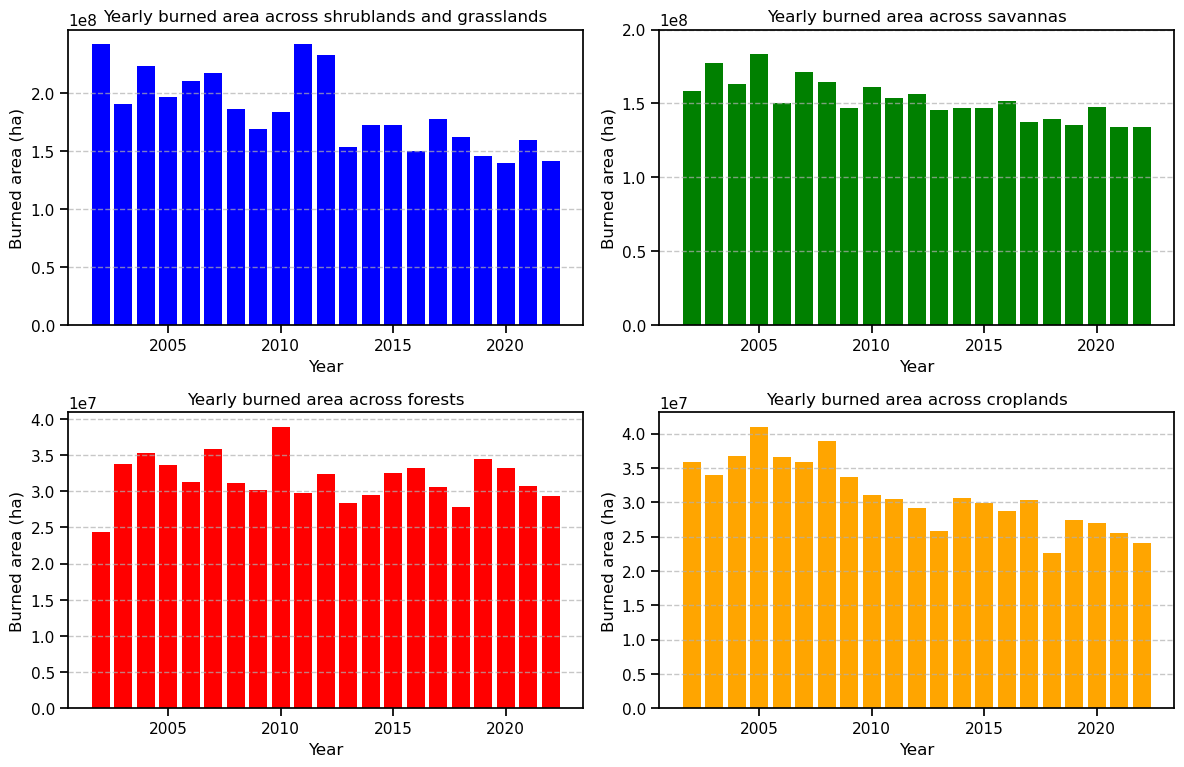

In [5]:
import matplotlib.pyplot as plt

# Extracting data for plotting
years = world_forest_data['Year']
shrublands_grasslands = world_forest_data['Yearly burned area across shrublands and grasslands']
savannas = world_forest_data['Yearly burned area across savannas']
forests = world_forest_data['Yearly burned area across forests']
croplands = world_forest_data['Yearly burned area across croplands']

# Plotting
plt.figure(figsize=(12, 8))

# Plot for Yearly burned area across shrublands and grasslands
plt.subplot(2, 2, 1)
plt.bar(years, shrublands_grasslands, color='b')
plt.title('Yearly burned area across shrublands and grasslands')
plt.xlabel('Year')
plt.ylabel('Burned area (ha)')
plt.yticks(range(0, 200000000 + 50000000, 50000000))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Yearly burned area across savannas
plt.subplot(2, 2, 2)
plt.bar(years, savannas, color='g')
plt.title('Yearly burned area across savannas')
plt.xlabel('Year')
plt.ylabel('Burned area (ha)')
plt.yticks(range(0, 200000000+ 50000000, 50000000))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Yearly burned area across forests
plt.subplot(2, 2, 3)
plt.bar(years, forests, color='r')
plt.title('Yearly burned area across forests')
plt.xlabel('Year')
plt.ylabel('Burned area (ha)')
#plt.yticks(range(0, 200000000 + 50000000, 50000000))
#plt.yticks(range(0, 50000000 + 5000000, 25000000))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Yearly burned area across croplands
plt.subplot(2, 2, 4)
plt.bar(years, croplands, color='orange')
plt.title('Yearly burned area across croplands')
plt.xlabel('Year')
plt.ylabel('Burned area (ha)')
#plt.yticks(range(0, 50000000 + 5000000, 25000000))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Wildfire area burned by land cover type, 2002 to 2022

In [6]:
# Load CSV file into a DataFrame
land = pd.read_csv('data/annual-burned-area-by-landcover.csv')
land.head()

,Entity,Code,Year,Yearly burned area across other land categories,Yearly burned area across croplands,Yearly burned area across forests,Yearly burned area across savannas,Yearly burned area across shrublands and grasslands
0,Afghanistan,AFG,2002,0.0000,14167.473,0.0,0.000,18052.793
1,Afghanistan,AFG,2003,1309.4180,21680.530,0.0,0.000,112030.360
2,Afghanistan,AFG,2004,407.8520,4357.571,0.0,0.000,24556.953
3,Afghanistan,AFG,2005,85.8640,1395.281,0.0,64.398,10883.193
4,Afghanistan,AFG,2006,1116.2269,9809.900,0.0,64.398,7169.603


In [7]:
world_land_data = land[(land['Entity'] == 'World') & (land['Code'] == 'OWID_WRL')]
world_land_data.head()

,Entity,Code,Year,Yearly burned area across other land categories,Yearly burned area across croplands,Yearly burned area across forests,Yearly burned area across savannas,Yearly burned area across shrublands and grasslands
4851,World,OWID_WRL,2002,920907.30,35789416.0,24417036.0,158605730.0,242925870.0
4852,World,OWID_WRL,2003,953664.25,33917016.0,33777550.0,177561680.0,191126500.0
4853,World,OWID_WRL,2004,1019178.10,36734068.0,35284390.0,162904820.0,223480290.0
4854,World,OWID_WRL,2005,1557241.50,41020372.0,33586056.0,183639900.0,196693950.0
4855,World,OWID_WRL,2006,1230681.20,36541216.0,31339608.0,150567600.0,210652450.0


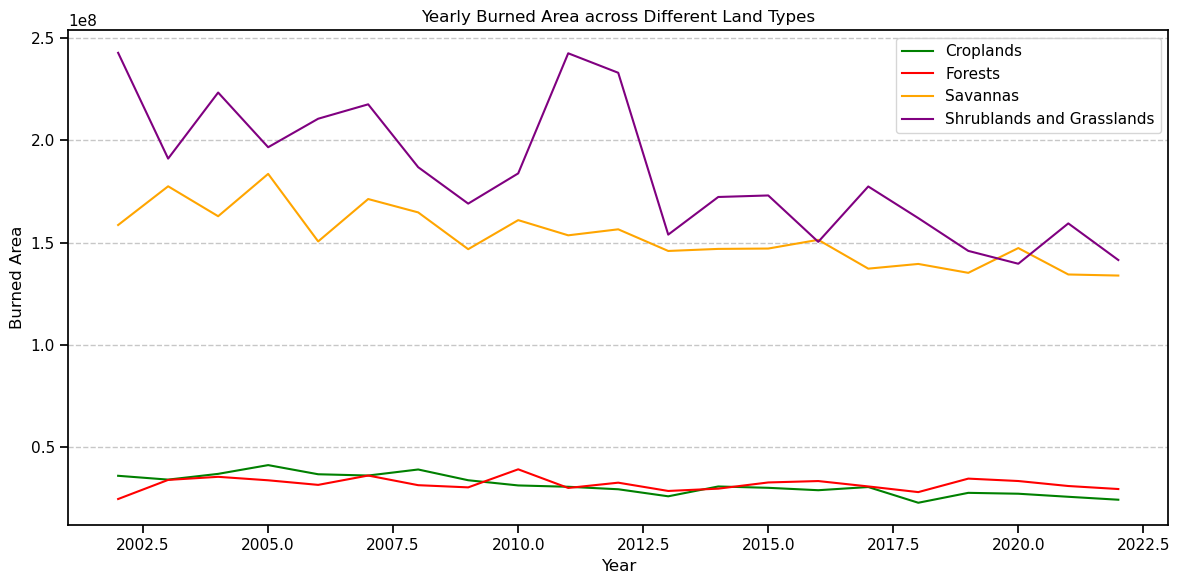

In [8]:
import matplotlib.pyplot as plt

# Extracting data for plotting
years = world_land_data['Year']
other_land = world_land_data['Yearly burned area across other land categories']
croplands = world_land_data['Yearly burned area across croplands']
forests = world_land_data['Yearly burned area across forests']
savannas = world_land_data['Yearly burned area across savannas']
shrublands_grasslands = world_land_data['Yearly burned area across shrublands and grasslands']

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(years, croplands, label='Croplands', color='green')
plt.plot(years, forests, label='Forests', color='red')
plt.plot(years, savannas, label='Savannas', color='orange')
plt.plot(years, shrublands_grasslands, label='Shrublands and Grasslands', color='purple')

plt.title('Yearly Burned Area across Different Land Types')
plt.xlabel('Year')
plt.ylabel('Burned Area')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


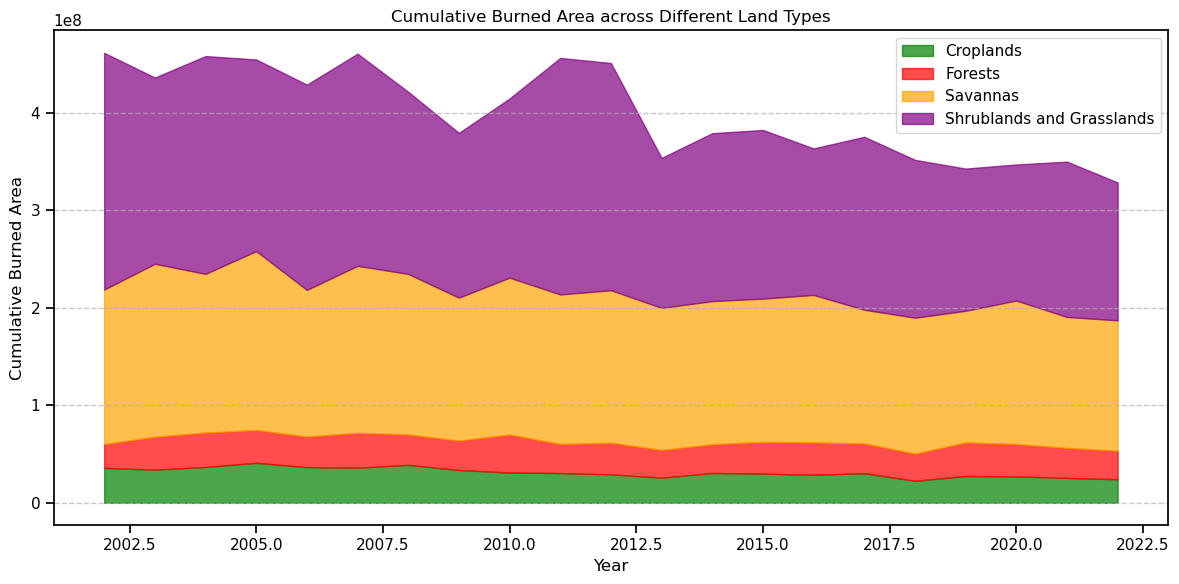

In [9]:
import matplotlib.pyplot as plt

# Extracting data for plotting
years = world_land_data['Year']
croplands = world_land_data['Yearly burned area across croplands']
forests = world_land_data['Yearly burned area across forests']
savannas = world_land_data['Yearly burned area across savannas']
shrublands_grasslands = world_land_data['Yearly burned area across shrublands and grasslands']

# Plotting
plt.figure(figsize=(12, 6))

plt.fill_between(years, croplands, label='Croplands', color='green', alpha=0.7)
plt.fill_between(years, croplands, croplands + forests, label='Forests', color='red', alpha=0.7)
plt.fill_between(years, croplands + forests, croplands + forests + savannas, label='Savannas', color='orange', alpha=0.7)
plt.fill_between(years, croplands + forests + savannas, croplands + forests + savannas + shrublands_grasslands, label='Shrublands and Grasslands', color='purple', alpha=0.7)

plt.title('Cumulative Burned Area across Different Land Types')
plt.xlabel('Year')
plt.ylabel('Cumulative Burned Area')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
